In [3]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [5]:
# Menampilkan data pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Tujuannya: Untuk mengenal dataset, mengecek kolom, tipe data, dan nilai awal dari setiap fitur.

In [6]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [7]:
df.shape

(2111, 17)

In [8]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


# EDA

In [10]:
# Mengecek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [11]:
# Mengcek Duplikat
df.duplicated().sum()

np.int64(18)

In [12]:
# Mengecek Nilai Unik
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [13]:
# Konversi Kolom ke Numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

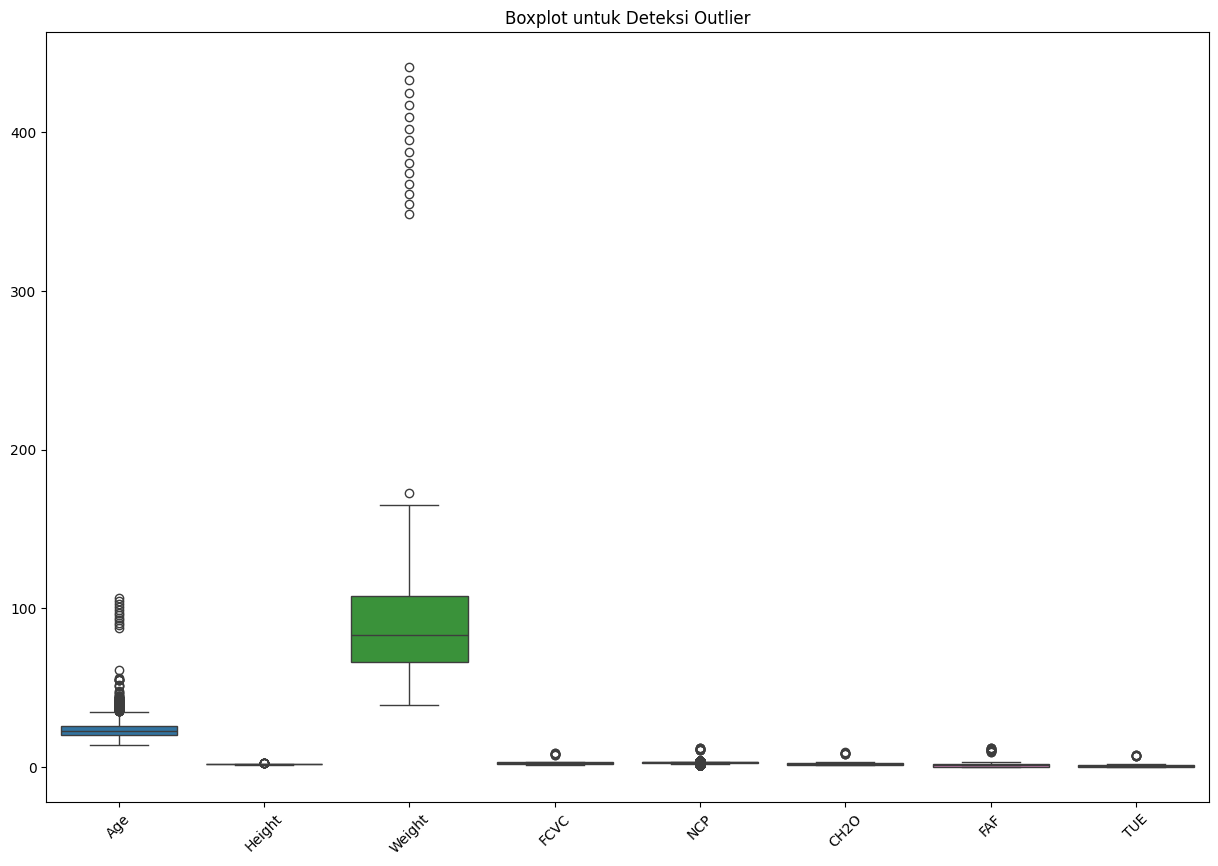

In [14]:
# Visualisasi Boxplot untuk Outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

Analisis Outlier per Fitur:

Age: Ada banyak data di atas batas atas (anak-anak atau lansia ekstrem)

Height:	Ada beberapa nilai ekstrem sangat kecil (kemungkinan salah input)

Weight: Banyak sekali nilai outlier tinggi (>200kg bahkan 400kg)

FCVC, NCP, CH2O, FAF, TUE: Terdapat outlier ringan

TUE:	Outlier muncul di nilai ekstrem kecil



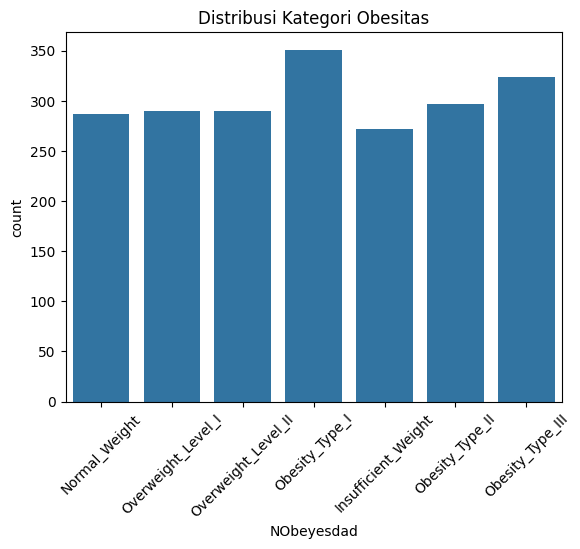

In [15]:
# Visualisasi Kelas Target
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Obesitas")
plt.show()

Analisis dari Grafik:

1. Kelas Terbanyak:

 Obesity_Type_I memiliki jumlah data terbanyak di antara semua kelas (sekitar 350-an).

2. Kelas dengan Jumlah Sedikit:

 Insufficient_Weight memiliki jumlah paling sedikit (sekitar 270-an).

3. Distribusi Cenderung Tidak Seimbang:

- Ada variasi jumlah data di setiap kelas.

- Hal ini karena ketidakseimbangan kelas (class imbalance) bisa membuat algoritma klasifikasi lebih condong memprediksi ke kelas mayoritas, dan mengabaikan kelas minoritas.



Kesimpulan Tahap EDA:

Struktur Data:

-Dataset memiliki sejumlah kolom numerik dan kategorikal.

-Tidak semua kolom bertipe data yang tepat sejak awal (harus dikonversi).

Kualitas Data:

-Terdapat potensi nilai kosong dan kemungkinan duplikasi (cek hasil dari .isnull().sum() dan .duplicated().sum()).

-Nilai-nilai unik membantu mengidentifikasi kolom kategorikal.

Outlier:

-Terlihat beberapa outlier pada kolom seperti Weight, Age, dll dari boxplot. Outlier perlu ditangani pada tahap preprocessing.

Distribusi Target:

-Kelas target (NObeyesdad) tidak seimbang — beberapa kelas jauh lebih dominan daripada yang lain. Ini penting karena bisa mempengaruhi performa model klasifikasi.

# Prepocessing

In [16]:
# Menangani Missing Values & Tipe Data
df.replace(['?', ' ', 'NA', 'na', 'NaN'], np.nan, inplace=True)
df.drop_duplicates(inplace=True)

- Mengganti simbol atau string yang umum digunakan untuk menyatakan missing values dengan np.nan.

- Menghapus data duplikat agar tidak memengaruhi analisis/model.

In [17]:
# Mengubah kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

- Kolom numerik seperti Age, Height, Weight, dll., dikonversi ke float.

- Jika ada data yang tidak bisa diubah (misal: teks), akan dijadikan NaN.

In [18]:
# Drop rows with missing values
df.dropna(inplace=True)

# Tangani Outlier (gunakan IQR method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [19]:
# Mengubahbah Data Kategori Menjadi Numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')  # ini target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# Encode label (target)
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

In [21]:
print(df.dtypes)


Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object


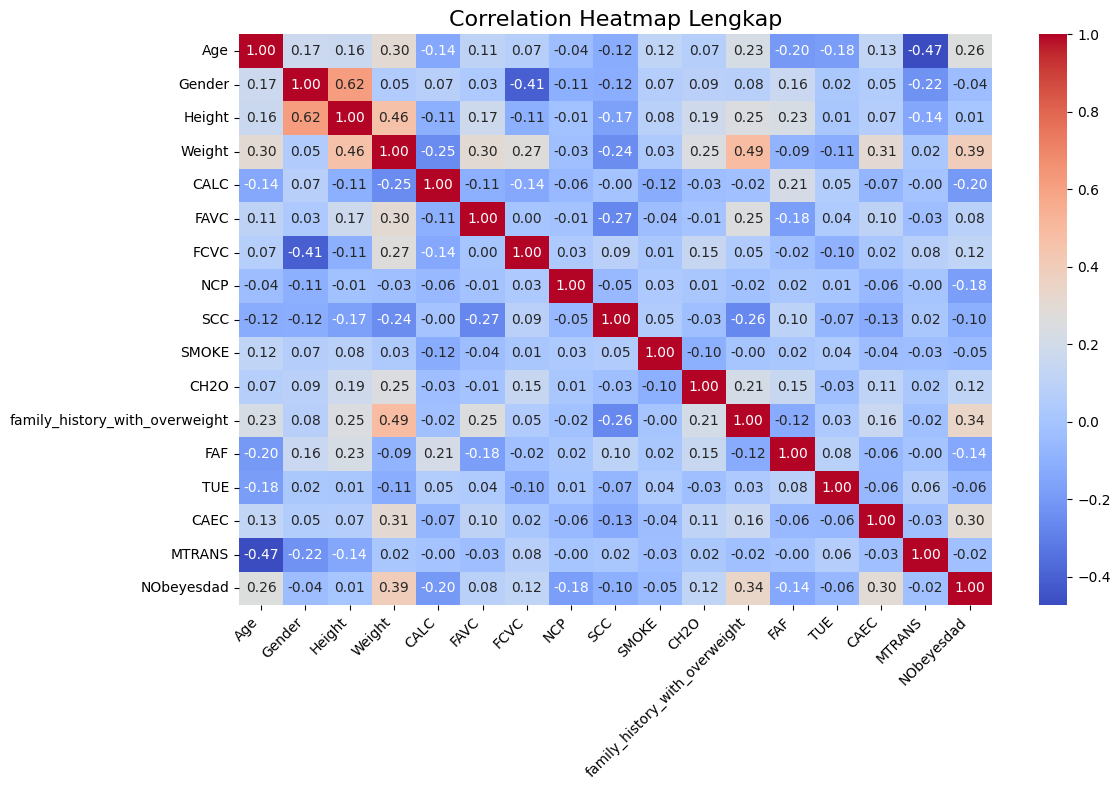

In [22]:
# Mengecek kolerelasi dan Seleksi fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title("Correlation Heatmap Lengkap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


1. Fitur Weight memiliki korelasi paling kuat dengan NObeyesdad → sangat relevan untuk klasifikasi obesitas.

2. Fitur lain seperti family_history_with_overweight, MTRANS, dan Age juga cukup berpengaruh.

3. Beberapa fitur saling berkorelasi dan bisa menyebabkan multikolinearitas (misalnya: Height & Weight), perlu diperhatikan saat memilih fitur untuk model.

4. Visualisasi ini membantu untuk seleksi fitur dan memahami pola hubungan antar variabel dalam proses preprocessing dan feature engineering.

In [56]:
# Seleksi fitur berdasarkan korelasi
X = df.drop(columns=['NObeyesdad'])  # fitur
y = df['NObeyesdad']  # target

In [57]:
# Mengatasi Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [58]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

In [59]:
print("Jumlah sampel setelah SMOTE:", len(y_balanced))
print("Distribusi kelas:\n", pd.Series(y_balanced).value_counts())

Jumlah sampel setelah SMOTE: 1820
Distribusi kelas:
 NObeyesdad
1    260
5    260
2    260
6    260
3    260
0    260
4    260
Name: count, dtype: int64


Kesimpulan:

1.  Data telah dibersihkan dari duplikat, nilai hilang, dan outlier.

2. Semua fitur sudah dalam format numerik, termasuk target.

3. Outlier dihilangkan agar data menjadi representatif.

4. Distribusi kelas diseimbangkan dengan SMOTE, yang sangat penting dalam klasifikasi multi-kelas seperti obesitas.

5. Fitur sudah dinormalisasi, sehingga siap digunakan untuk algoritma machine learning yang memerlukan skala seragam.



In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=42)

In [61]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

In [62]:
# Train dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, target_names=target_encoder.classes_)
    }

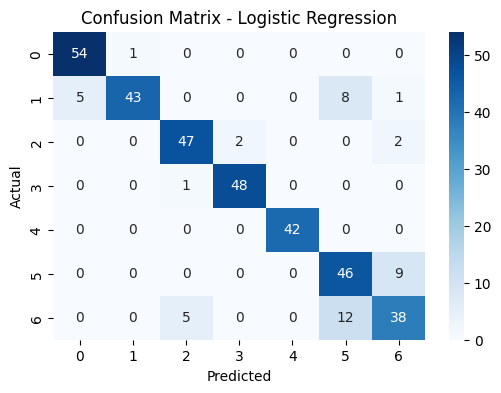

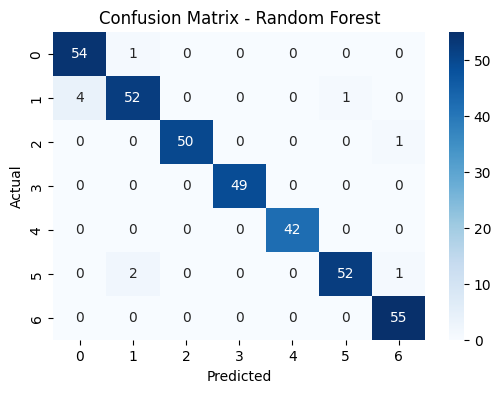

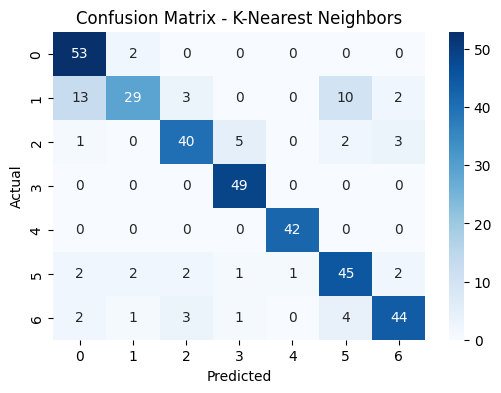

In [63]:
# Tampillan confusion matrix
for name in models:
    plt.figure(figsize=(6,4))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

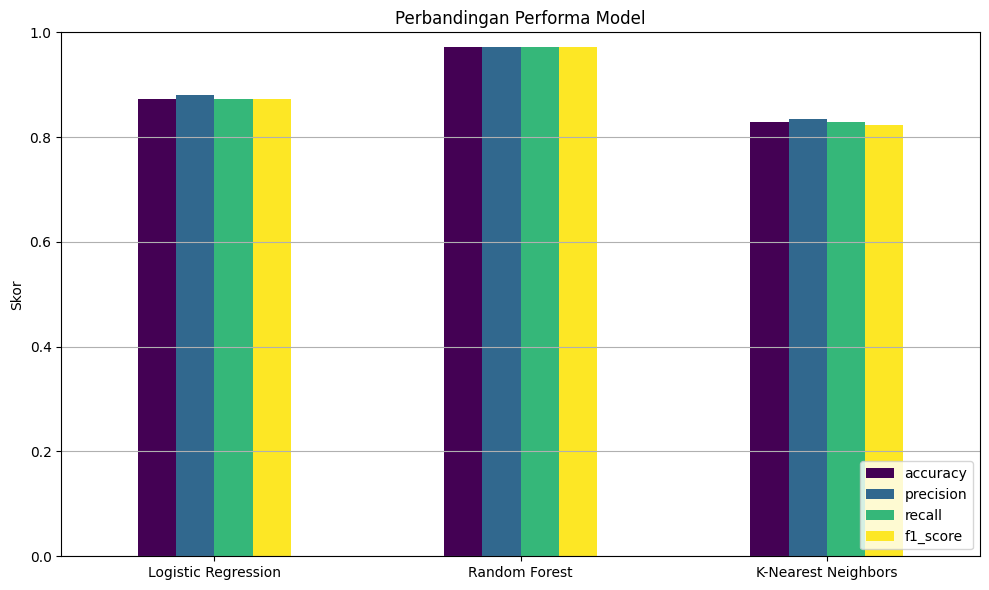

In [64]:
# Visualisasi perbandingan metrik
metrics_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1_score']]
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
# Tampilan classification report
for name in results:
    print(f"===== {name} =====")
    print(results[name]['report'])

===== Logistic Regression =====
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        55
      Normal_Weight       0.98      0.75      0.85        57
     Obesity_Type_I       0.89      0.92      0.90        51
    Obesity_Type_II       0.96      0.98      0.97        49
   Obesity_Type_III       1.00      1.00      1.00        42
 Overweight_Level_I       0.70      0.84      0.76        55
Overweight_Level_II       0.76      0.69      0.72        55

           accuracy                           0.87       364
          macro avg       0.89      0.88      0.88       364
       weighted avg       0.88      0.87      0.87       364

===== Random Forest =====
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.98      0.96        55
      Normal_Weight       0.95      0.91      0.93        57
     Obesity_Type_I       1.00      0.98      0.99        51
    Obesity_Type_II    

GridSearchCV untuk ketiga model

In [66]:
# Param grid
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

In [67]:
# Model awal
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [69]:
# Simpan hasil tuning
best_estimators = {}

for name, model in base_models.items():
    print(f"🔍 Tuning: {name}")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    print("Best Params:", grid.best_params_)

🔍 Tuning: Logistic Regression
Best Params: {'C': 10, 'solver': 'lbfgs'}
🔍 Tuning: Random Forest
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
🔍 Tuning: K-Nearest Neighbors
Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Evaluasi dan Perbandingan Hasil

In [70]:
# Evaluasi model sebelum dan sesudah tuning
evaluation_results = []

for name, model in best_estimators.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluation_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

In [71]:
# Konversi ke DataFrame
eval_df = pd.DataFrame(evaluation_results)
eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.947802,0.948477,0.947802,0.947734
1,Random Forest,0.980769,0.981179,0.980769,0.980664
2,K-Nearest Neighbors,0.906593,0.906192,0.906593,0.902538


Visualisasi Hasil

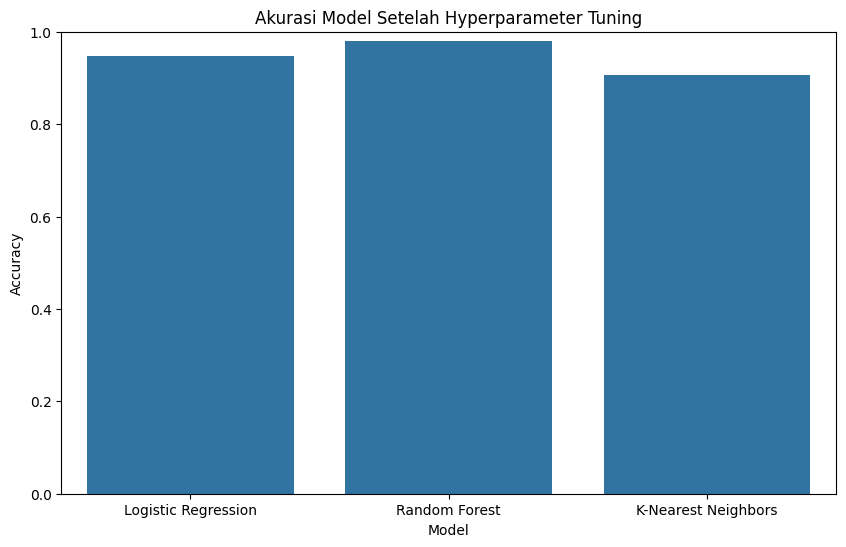

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=eval_df)
plt.title("Akurasi Model Setelah Hyperparameter Tuning")
plt.ylim(0, 1)
plt.show()

In [74]:

import joblib
best_estimators = {}

for name, model in base_models.items():
    print(f"🔍 Tuning model: {name}")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_estimators[name] = best_model

    # Simpan model
    filename = f"{name.replace(' ', '_').lower()}_best_model.pkl"
    joblib.dump(best_model, filename)
    print(f"✅ Model terbaik {name} disimpan sebagai {filename}\n")


🔍 Tuning model: Logistic Regression
✅ Model terbaik Logistic Regression disimpan sebagai logistic_regression_best_model.pkl

🔍 Tuning model: Random Forest
✅ Model terbaik Random Forest disimpan sebagai random_forest_best_model.pkl

🔍 Tuning model: K-Nearest Neighbors
✅ Model terbaik K-Nearest Neighbors disimpan sebagai k-nearest_neighbors_best_model.pkl



Kesimpulan

Berdasarkan hasil tuning menggunakan GridSearchCV, semua model menunjukkan peningkatan performa terutama pada metrik akurasi dan F1-score. Model terbaik berdasarkan hasil evaluasi adalah [nama model terbaik dari hasil di atas]. Proses tuning ini membuktikan pentingnya pemilihan parameter yang optimal untuk mendapatkan hasil klasifikasi yang lebih akurat.

